In [ ]:
!pip install llama-index -qU
!pip install -q openai
!pip install pypdf
!pip install doc2txt
!pip install -qU llama-cpp-python
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.0/143.0 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.4/225.4 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 3.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.9.0 which is incompatible.


In [ ]:
!pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 4.6 MB/s eta 0:00:00


## import required dependencies

In [ ]:
import os
import openai
from getpass import getpass
#
import logging
import sys
from pprint import pprint
#
logging.basicConfig(stream=sys.stdout, level=logging.INFO)
logging.getLogger().addHandler(logging.StreamHandler(stream=sys.stdout))
#


In [ ]:
from llama_index import(VectorStoreIndex,
                        SimpleDirectoryReader,
                        load_index_from_storage,
                        StorageContext,
                        ServiceContext,
                        Document)

from llama_index.llms import OpenAI,HuggingFaceLLM
from llama_index.prompts import PromptTemplate
from llama_index.text_splitter import SentenceSplitter
from llama_index.embeddings import OpenAIEmbedding,HuggingFaceEmbedding
from llama_index.schema import MetadataMode
from llama_index.postprocessor import MetadataReplacementPostProcessor

## setup the openai api key

In [ ]:
from google.colab import userdata
os.environ['OPENAI_API_KEY'] = userdata.get('OPENAI_API_KEY')
os.environ["HUGGINGFACE_API_KEY"] = userdata.get("HUGGINGFACE_API_KEY")

## Set up the llm

In [ ]:
from llama_index.llms import HuggingFaceLLM
from llama_index.prompts import PromptTemplate
llm = HuggingFaceLLM(
    model_name="HuggingFaceH4/zephyr-7b-beta",
    tokenizer_name="HuggingFaceH4/zephyr-7b-beta",
    #query_wrapper_prompt=PromptTemplate("<|system|>Please check if the following pieces of context has any mention of the keywords provided in the question.If not ten say that you do not know the answer.Please do not make up your own answer.</s>\n<|user|>\nQuestion:{query_str}</s>\n<|assistant|>\n"),
    # query_wrapper_prompt=PromptTemplate(template),
    context_window=4096,
    max_new_tokens=512,
    model_kwargs={'trust_remote_code':True},
    generate_kwargs={"temperature": 0.0},
    device_map="auto",)

config.json:   0%|          | 0.00/638 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00008.safetensors:   0%|          | 0.00/1.89G [00:00<?, ?B/s]

model-00002-of-00008.safetensors:   0%|          | 0.00/1.95G [00:00<?, ?B/s]

model-00003-of-00008.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00004-of-00008.safetensors:   0%|          | 0.00/1.95G [00:00<?, ?B/s]

model-00005-of-00008.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00006-of-00008.safetensors:   0%|          | 0.00/1.95G [00:00<?, ?B/s]

model-00007-of-00008.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00008-of-00008.safetensors:   0%|          | 0.00/816M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/8 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.43k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/168 [00:00<?, ?B/s]

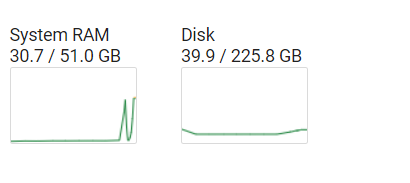

## Set up the embedding Model

In [ ]:
from llama_index.embeddings import resolve_embed_model
from llama_index.embeddings.huggingface import HuggingFaceEmbedding
#embed_model = resolve_embed_model("local:BAAI/bge-large-en-v1.5")
embed_model = HuggingFaceEmbedding(model_name="BAAI/bge-large-en-v1.5")

config.json:   0%|          | 0.00/779 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [ ]:
embed_model

HuggingFaceEmbedding(model_name='BAAI/bge-large-en-v1.5', embed_batch_size=10, callback_manager=<llama_index.callbacks.base.CallbackManager object at 0x7d0ffcb23b50>, tokenizer_name='BAAI/bge-large-en-v1.5', max_length=512, pooling=<Pooling.CLS: 'cls'>, normalize=True, query_instruction=None, text_instruction=None, cache_folder=None)

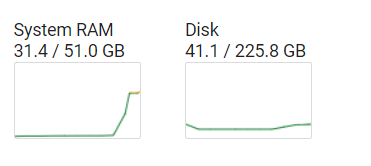

## Fecth the data nd save it locally

In [ ]:
!mkdir -p 'Data'

In [ ]:

!wget 'https://www.gutenberg.org/cache/epub/72306/pg72306.txt' -O 'Data/teahistory.txt'
!wget 'https://www.gutenberg.org/cache/epub/11367/pg11367.txt' -O 'Data/chinahistory.txt'

--2023-12-18 14:53:57--  https://www.gutenberg.org/cache/epub/72306/pg72306.txt
Resolving www.gutenberg.org (www.gutenberg.org)... 152.19.134.47, 2610:28:3090:3000:0:bad:cafe:47
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 493827 (482K) [text/plain]
Saving to: ‘Data/teahistory.txt’

Data/teahistory.txt 100%[===================>] 482.25K  --.-KB/s    in 0.1s    

2023-12-18 14:53:57 (4.87 MB/s) - ‘Data/teahistory.txt’ saved [493827/493827]

--2023-12-18 14:53:58--  https://www.gutenberg.org/cache/epub/11367/pg11367.txt
Resolving www.gutenberg.org (www.gutenberg.org)... 152.19.134.47, 2610:28:3090:3000:0:bad:cafe:47
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977274 (954K) [text/plain]
Saving to: ‘Data/chinahistory.txt’

Data/chinahistory.t 100%[===================>] 954.37K  5.48MB/s    in 0.2s    


## Load the data into Document Object

In [ ]:
documents = SimpleDirectoryReader('./Data/').load_data()
print(len(documents))
pprint(documents)

12
[Document(id_='4538122a-90cd-4af5-b6e9-84b8399da135', embedding=None, metadata={'page_label': '1', 'file_name': 'face-recognition-system-using-python.pdf', 'file_path': 'Data/face-recognition-system-using-python.pdf', 'file_type': 'application/pdf', 'file_size': 465666, 'creation_date': '2023-12-21', 'last_modified_date': '2023-12-21', 'last_accessed_date': '2023-12-21'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={}, hash='a819d446ca212183fcf6284e3cc010747bf04a25aa39040bff8877fe5e35734d', text='Face Recognition System Using Python\n\xa0This article was published as a part of the Data Science Blogathon.\nIntroduction\nFace recognition is different from face detection. In face detection, we had only detected the location of\nhuman faces, and we recognized t

In [ ]:
documents[0].get_content()

'Face Recognition System Using Python\n\xa0This article was published as a part of the Data Science Blogathon.\nIntroduction\nFace recognition is different from face detection. In face detection, we had only detected the location of\nhuman faces, and we recognized the identity of faces in the face recognition task.\nIn this article, we are going to build a face recognition system using python with the help of face\nrecognition library .\nThere are many algorithms available in the market for face recognition. This broad computer vision\nchallenge is detecting faces from videos and pictures. Many applications can be built on top of recognition\nsystems. Many big companies are adopting recognition systems for their security and authentication\npurposes.\nUse Cases of Recognition Systems\nFace recognition systems are widely used in the modern era, and many new innovative systems are built on\ntop of recognition systems.\nThere are a few used cases :\nFinding Missing Person\nIdentifying acc

In [ ]:
documents[0].metadata

{'file_path': 'Data/chinahistory.txt',
 'file_name': 'chinahistory.txt',
 'file_type': 'text/plain',
 'file_size': 977274,
 'creation_date': '2023-12-18',
 'last_modified_date': '2023-12-05',
 'last_accessed_date': '2023-12-18'}

## Node parsing and Indexing (Base and Sentence Window Method)

In [ ]:
#create senetence window node parser with default settings
from llama_index.node_parser import SentenceWindowNodeParser,SimpleNodeParser
sentence_node_parser = SentenceWindowNodeParser.from_defaults(
    window_size=3,
    window_metadata_key="window",
    original_text_metadata_key="original_text")
#base_node_parser = SentenceSplitter(llm=llm)
base_node_parser = SimpleNodeParser()

In [ ]:
nodes = sentence_node_parser.get_nodes_from_documents(documents)
base_nodes = base_node_parser.get_nodes_from_documents(documents)

In [ ]:
print(f"SENTENCE NODES :\n {nodes[10]}")
print(f"BASE NODES :\n {base_nodes[10]}")

SENTENCE NODES :
 Node ID: 8418b939-dc08-42a6-8ee1-821e46f7a2a1
Text: Traditional Face Recognition Algorithm Traditional face
recognition algorithms don’t meet modern-day’s facial recognition
standards.
BASE NODES :
 Node ID: 7a94495b-2f49-4cc4-8fd4-87f5fb0f645e
Text: Now let’s test the model prediction using text in different
languages. def predict(text): x = cv.transform([text]).toarray() #
converting text to bag of words model (Vector) lang = model.predict(x)
# predicting the language lang = le.inverse_transform(lang) # finding
the language corresponding the the predicted value print("The langauge
is in",l...


In [ ]:
dict(nodes[10]) # since no indexing performed so embeding is None

{'id_': '8418b939-dc08-42a6-8ee1-821e46f7a2a1',
 'embedding': None,
 'metadata': {'window': 'Many big companies are adopting recognition systems for their security and authentication\npurposes.\n Use Cases of Recognition Systems\nFace recognition systems are widely used in the modern era, and many new innovative systems are built on\ntop of recognition systems.\n There are a few used cases :\nFinding Missing Person\nIdentifying accounts on social media\nRecognizing Drivers in Cars\nSchool Attendance System\nSeveral methods and algorithms implement facial recognition systems depending on the performance and\naccuracy.\n Traditional Face Recognition Algorithm\nTraditional face recognition algorithms don’t meet modern-day’s facial recognition standards.  They were\ndesigned to recognize faces using old conventional algorithms.\n OpenCV provides some traditional facial Recognition Algorithms.\n',
  'original_text': 'Traditional Face Recognition Algorithm\nTraditional face recognition algor

* the sentence nodes captures the relationshsips as well

In [ ]:
dict(base_nodes[10])

{'id_': '7a94495b-2f49-4cc4-8fd4-87f5fb0f645e',
 'embedding': None,
 'metadata': {'page_label': '5',
  'file_name': 'language-detection-using-natural-language-processing.pdf',
  'file_path': 'Data/language-detection-using-natural-language-processing.pdf',
  'file_type': 'application/pdf',
  'file_size': 195783,
  'creation_date': '2023-12-21',
  'last_modified_date': '2023-12-21',
  'last_accessed_date': '2023-12-21'},
 'excluded_embed_metadata_keys': ['file_name',
  'file_type',
  'file_size',
  'creation_date',
  'last_modified_date',
  'last_accessed_date'],
 'excluded_llm_metadata_keys': ['file_name',
  'file_type',
  'file_size',
  'creation_date',
  'last_modified_date',
  'last_accessed_date'],
 'relationships': {<NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(node_id='a4b1f114-415f-439d-b3f4-379c8d71fc43', node_type=<ObjectType.DOCUMENT: '4'>, metadata={'page_label': '5', 'file_name': 'language-detection-using-natural-language-processing.pdf', 'file_path': 'Data/language-detect

## Setup the ServiceContext

#### If using openai

In [ ]:
llm = OpenAI(temperature=0.1,model="gpt-3.5-turbo")

In [ ]:
ctx_sentence = ServiceContext.from_defaults(llm=llm,
                                            embed_model=OpenAIEmbedding(embed_batch_size=50),
                                            node_parser=nodes)

In [ ]:
#
ctx_base = ServiceContext.from_defaults(llm=llm,
                                            embed_model=OpenAIEmbedding(embed_batch_size=50),
                                            node_parser=base_nodes)

#### When using Local LLMS

In [ ]:
ctx_sentence = ServiceContext.from_defaults(
    llm=llm,
    embed_model=embed_model,
    node_parser=nodes)
#
#
ctx_base = ServiceContext.from_defaults(
    llm=llm,
    embed_model=embed_model,
    node_parser=base_nodes)

In [ ]:
sentence_index = VectorStoreIndex(
    nodes,
    service_context=ctx_sentence)
base_index = VectorStoreIndex(
    base_nodes,
    service_context=ctx_base)

## Define Query Engine

In [ ]:
from llama_index.indices.postprocessor import MetadataReplacementPostProcessor
sentence_query_engine = sentence_index.as_query_engine(
    similarity_top_k=5,
    verbose=True,
    node_postprocessor=[
        MetadataReplacementPostProcessor("window")
        ],
    )

In [ ]:
base_query_engine = base_index.as_query_engine(
    similarity_top_k=5,
    verbose=True,
    node_postprocessor=[
        MetadataReplacementPostProcessor("window")
        ],
    )

## Run Query for SentenceWindow Parser Query engine

In [ ]:
query ="Sample code to detect faces in an image using python."
response = sentence_query_engine.query(query)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1473: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use and modify the model generation configuration (see https://huggingface.co/docs/transformers/generation_strategies#default-text-generation-configuration )
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:381: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


In [ ]:
from IPython.display import display,Markdown
display(Markdown(f"<b>{response}</b>"))

<b>

Here's a sample code to detect faces in an image using Python and the OpenCV library:

```python
import cv2
import numpy as np

# Load the pre-trained face detection model
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Load the image
img = cv2.imread('image.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces in the grayscale image
faces = face_cascade.detectMultiScale(gray, 1.2, 5)

# Draw a rectangle around each face
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Display the image with the detected faces
cv2.imshow('Face Detection', img)
cv2.waitKey(0)
cv2.destroyAllWindows()
```

In this code, we first load the pre-trained face detection model using the `CascadeClassifier` function from OpenCV. We then load the image, convert it to grayscale, and pass it to the `detectMultiScale` function of the face detection model to detect faces. We then draw a rectangle around each face using the `rectangle` function of OpenCV. Finally, we display the image with the detected faces using the `imshow` function of OpenCV.

Note: Make sure to replace 'haarcascade_frontalface_default.xml' with the path to your pre-trained face detection model.</b>

## Run Query for Base Node Parser Query engine

In [ ]:
response = base_query_engine.query(query)
#
display(Markdown(f"<b>{response}</b>"))

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:381: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


<b>

```python
import cv2
import numpy as np

img = cv2.imread('image.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.2, 5)

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()
```

This code uses the Haar Cascade algorithm to detect faces in an image. The `haarcascade_frontalface_default.xml` file contains the trained classifier for face detection. The `detectMultiScale()` function is used to detect multiple faces in the image with a certain scale factor and minimum neighbor size. The detected faces are then drawn as rectangles on the original image using the `rectangle()` function. The `imshow()` function is used to display the image, and the `waitKey()` function is used to wait for a key press before closing the window. The `destroyAllWindows()` function is used to destroy all the windows created during the execution of the program.</b>

## Save and Reload the VectorStore

## Mount drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Save to Persistent Storage

In [ ]:
sentence_index.storage_context.persist(persist_dir="/content/drive/MyDrive/s_index")
base_index.storage_context.persist(persist_dir="/content/drive/MyDrive/b_index")

## Retrieve from Storage

In [ ]:
# rebuild storage
SC_retrieved_sentence = StorageContext.from_defaults(persist_dir="/content/drive/MyDrive/s_index/")
SC_retrieved_base = StorageContext.from_defaults(persist_dir="/content/drive/MyDrive/b_index/")

## Load Index

In [ ]:
retrieved_sentence_index = load_index_from_storage(
    SC_retrieved_sentence,
    service_context=ctx_sentence)
retrieved_base_index = load_index_from_storage(
    SC_retrieved_base,
    service_context=ctx_base)

## Create Query Engine

In [ ]:
from llama_index.postprocessor import MetadataReplacementPostProcessor
#
sentence_query_engine = retrieved_sentence_index.as_query_engine(similarity_top_k=5,
                                                                 verbose=True,
                                                                 node_postprocessor=[MetadataReplacementPostProcessor("window")],)
base_query_engine = retrieved_base_index.as_query_engine(similarity_top_k=5,
                                                                 verbose=True,
                                                                 )

## Inference

In [ ]:

base_response = base_query_engine.query(query)
#
display(Markdown(f"<b>{response}</b>"))


/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:381: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


<b>

```python
import cv2
import numpy as np

img = cv2.imread('image.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.2, 5)

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()
```

This code uses the Haar Cascade algorithm to detect faces in an image. The `haarcascade_frontalface_default.xml` file contains the trained classifier for face detection. The `detectMultiScale()` function is used to detect multiple faces in the image with a certain scale factor and minimum neighbor size. The detected faces are then drawn as rectangles on the original image using the `rectangle()` function. The `imshow()` function is used to display the image, and the `waitKey()` function is used to wait for a key press before closing the window. The `destroyAllWindows()` function is used to destroy all the windows created during the execution of the program.</b>

In [ ]:
display(Markdown(f"<b>{base_response}</b>"))

<b>

```python
import cv2
import numpy as np

img = cv2.imread('image.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.2, 5)

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()
```

This code uses the Haar Cascade algorithm to detect faces in an image. The `haarcascade_frontalface_default.xml` file contains the trained classifier for face detection. The `detectMultiScale()` function is used to detect multiple faces in the image with a certain scale factor and minimum neighbor size. The detected faces are then drawn as rectangles on the original image using the `rectangle()` function. The `imshow()` function is used to display the image, and the `waitKey()` function is used to wait for a key press before closing the window. The `destroyAllWindows()` function is used to destroy all the windows created during the execution of the program.</b>

In [ ]:
sentence_response = sentence_query_engine.query(query)
display(Markdown(f"<b>{response}</b>"))


<b>

```python
import cv2
import numpy as np

img = cv2.imread('image.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.2, 5)

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()
```

This code uses the Haar Cascade algorithm to detect faces in an image. The `haarcascade_frontalface_default.xml` file contains the trained classifier for face detection. The `detectMultiScale()` function is used to detect multiple faces in the image with a certain scale factor and minimum neighbor size. The detected faces are then drawn as rectangles on the original image using the `rectangle()` function. The `imshow()` function is used to display the image, and the `waitKey()` function is used to wait for a key press before closing the window. The `destroyAllWindows()` function is used to destroy all the windows created during the execution of the program.</b>

In [ ]:
display(Markdown(f"<b>{sentence_response}</b>"))

<b>

Here's a sample code to detect faces in an image using Python and the OpenCV library:

```python
import cv2
import numpy as np

# Load the pre-trained face detection model
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Load the image
img = cv2.imread('image.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces in the grayscale image
faces = face_cascade.detectMultiScale(gray, 1.2, 5)

# Draw a rectangle around each face
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Display the image with the detected faces
cv2.imshow('Face Detection', img)
cv2.waitKey(0)
cv2.destroyAllWindows()
```

In this code, we first load the pre-trained face detection model using the `CascadeClassifier` function from OpenCV. We then load the image, convert it to grayscale, and pass it to the `detectMultiScale` function of the face detection model to detect faces. We then draw a rectangle around each face using the `rectangle` function of OpenCV. Finally, we display the image with the detected faces using the `imshow` function of OpenCV.

Note: Make sure to replace 'haarcascade_frontalface_default.xml' with the path to your pre-trained face detection model.</b>